In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from __future__ import division
import numpy as np
from setup import *
from OrbitalMotion import numerical_orbital_evolution, analytical_orbital_evolution, analytical_split
c,G,Msolar,AU, pc = univeral_constants()

In [32]:
# fitting functions for the eccentricity
def doube_trig_function(t,A,B,omega,offset):
    return A*np.sin(omega*t) + B*np.cos(omega*t)  + offset
    
def extract(data):
    t = data[:,0]
    f = data[:,1] 
    print ('extract ecc')
    
        
    sigma = np.ones(len(t))
    sigma[[0, -1]] = 1e-6
    
    
    func = doube_trig_function
    offset = (f.max() + f.min()) / 2
    y_shifted = f - offset
    delta = 1e-6
    p0 = (
         (f.max() - f.min()) / 2,
         (f.max() - f.min()) / 2,
         np.pi * np.sum(y_shifted[:-1] * y_shifted[1:] < 0) / (t.max() - t.min()),
        offset
         )
        
   
    popt, pcov = curve_fit(func, t,f,p0=p0)
    
    
    return popt

3152500.0 0.3211183383042457 315361
3153600.0 0.31651847944573414 315361
extract ecc
0.31802615759479635 0.31651847944573414 0.00476331793234431


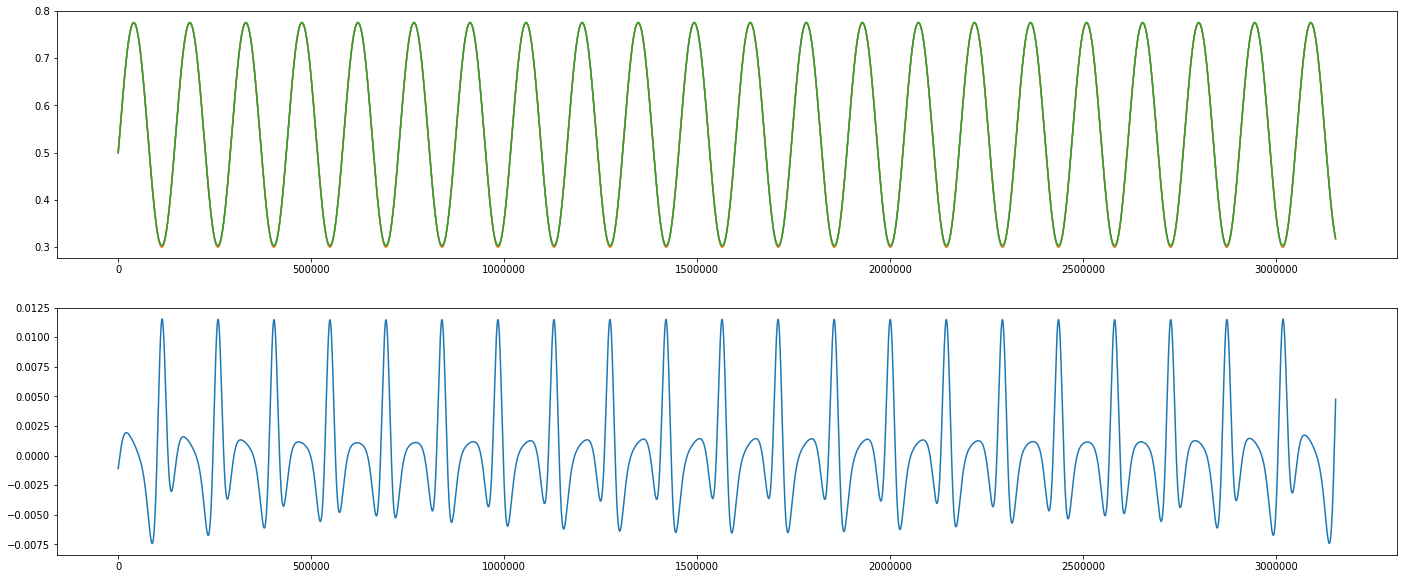

In [34]:
%matplotlib inline
from scipy.optimize import curve_fit 
data = np.load('eccentricity_data.npy')
t = data[:,0]
e = data[:,1]

dataHR = np.load('eccentricity_dataHR.npy')
tH = dataHR[:,0]
eH = dataHR[:,1]

print (t[-1], e[-1], len(tH))
print (tH[-1], eH[-1], len(tH))

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(24,10)) 
ax1 = plt.subplot2grid((2,1), (0,0))
ax2 = plt.subplot2grid((2,1), (1,0),sharex=ax1)
ax1.plot(t,e)
ax1.plot(tH,eH)


#Now try and fit it. 
A,B,omega,offset = extract(data)
OmT = omega*tH
e_approx = A*np.sin(OmT) +B*np.cos(OmT)  + offset 
ax1.plot(tH,e_approx)
de = (e_approx-eH)/eH
ax2.plot(tH,de)

print (e_approx[-1], eH[-1],de[-1])
